<a href="https://colab.research.google.com/github/zverulana/da_study/blob/main/%D0%94%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_Pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
# @title
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Генерация случайных данных
np.random.seed(42)
n_rows = 1000

product_names = ["Ноутбук", "Смартфон", "Планшет", "Наушники", "Клавиатура", "Мышь", "Монитор", "Часы", "Колонка", "Флешка"]
categories = ["Электроника", "Аксессуары", "Гаджеты"]
customer_names = ["Иванов", "Петров", "Сидоров", "Кузнецов", "Смирнов", "Васильев", "Морозов", "Павлов", "Фёдоров", "Белов"]

sales_data = {
    "order_id": np.arange(1, n_rows + 1),
    "customer_name": np.random.choice(customer_names, n_rows),
    "product": np.random.choice(product_names, n_rows),
    "category": np.random.choice(categories, n_rows),
    "price": np.random.randint(500, 50000, n_rows),
    "quantity": np.random.randint(1, 5, n_rows),
    "order_date": [datetime.today() - timedelta(days=np.random.randint(1, 365)) for _ in range(n_rows)],
    "rating": np.round(np.random.uniform(1, 5, n_rows), 1),
}

df = pd.DataFrame(sales_data)

customers = pd.DataFrame({
    "customer_name": customer_names,
    "city": ["Москва", "СПб", "Новосибирск", "Екатеринбург", "Казань",
             "Челябинск", "Омск", "Самара", "Ростов", "Уфа"]
})

# 1. Вывести 5 первых строк датасета.

In [418]:
df.head()

,order_id,customer_name,product,category,price,quantity,order_date,rating
0,1,Морозов,Ноутбук,Аксессуары,43252,2,2024-12-02 16:01:57.354186,2.4
1,2,Кузнецов,Часы,Аксессуары,32827,1,2025-10-12 16:01:57.354230,2.0
2,3,Павлов,Наушники,Электроника,42570,4,2025-08-30 16:01:57.354250,1.1
3,4,Смирнов,Наушники,Гаджеты,20889,1,2025-09-06 16:01:57.354266,3.2
4,5,Морозов,Клавиатура,Электроника,40697,4,2025-10-08 16:01:57.354281,4.4


# 2. Определить количество уникальных товаров.

In [419]:
df['product'].nunique()

10

# 3. Подсчитать количество заказов по каждому товару.

In [420]:
product_count = df.groupby('product').agg({'order_id':'count'})
product_count

,order_id
product,
Клавиатура,101
Колонка,103
Монитор,99
Мышь,95
Наушники,87
Ноутбук,106
Планшет,95
Смартфон,113
Флешка,101


# 4. Найти товар с наибольшим количеством заказов.

In [421]:
product_count.idxmax()

,0
order_id,Смартфон


# 5. Найти среднюю цену каждого товара.

In [422]:
average = df.groupby('product').agg({'price': 'mean'})
average

,price
product,
Клавиатура,26837.227723
Колонка,27625.766990
Монитор,24662.111111
Мышь,24331.063158
Наушники,25754.919540
Ноутбук,23424.169811
Планшет,25149.042105
Смартфон,25693.292035
Флешка,24659.584158


# 6. Вывести топ-5 самых дорогих товаров по средней цене.

In [423]:
average.sort_values(by = ('price'), ascending = False).head()

,price
product,
Колонка,27625.766990
Клавиатура,26837.227723
Наушники,25754.919540
Смартфон,25693.292035
Планшет,25149.042105


# 7. Найти суммарную выручку по каждому товару.

In [424]:
sum = df.groupby('product').agg({'price': 'sum'})
sum

,price
product,
Клавиатура,2710560
Колонка,2845454
Монитор,2441549
Мышь,2311451
Наушники,2240678
Ноутбук,2482962
Планшет,2389159
Смартфон,2903342
Флешка,2490618


# 8. Найти самый прибыльный товар.

In [425]:
sum.sort_values(by = ('price'), ascending = False).head(1)

,price
product,
Смартфон,2903342


# 9. Определить, сколько заказов сделал каждый клиент.


In [426]:
clients = df.groupby('customer_name')['order_id'].agg('count')
clients

,order_id
customer_name,
Белов,107
Васильев,96
Иванов,118
Кузнецов,94
Морозов,94
Павлов,100
Петров,83
Сидоров,110
Смирнов,107


# 10. Найти клиента, совершившего больше всего заказов.


In [427]:
clients.sort_values(ascending = False).head(1)

,order_id
customer_name,
Иванов,118


# 11. Определить, какой клиент потратил больше всего денег.


In [428]:
clients_sum = df.groupby('customer_name')['price'].agg('sum')
clients_sum.sort_values(ascending = False).head(1)

,price
customer_name,
Смирнов,2817806


# 12. Определить средний чек заказа.


In [429]:
print(f"Средний чек: {df['price'].mean()}")

Средний чек: 25175.469


# 13. Найти общее количество проданных товаров.


In [430]:
print(f"Количество проданных товаров: {df['quantity'].sum()}")

Количество проданных товаров: 2467


# 14. Определить товар с наибольшим общим количеством продаж.


In [431]:
product_max = df.groupby('product')['quantity'].sum()
product_max.sort_values(ascending = False).head(1)

,quantity
product,
Смартфон,269


# 15. Найти средний рейтинг товаров.


In [432]:
print(df['rating'].mean())

2.9704


# 16. Определить, какой товар имеет самый высокий средний рейтинг.


In [433]:
product_rating = df.groupby('product')['rating'].mean()
product_rating.sort_values(ascending = False).head(1)

,rating
product,
Ноутбук,3.183962


# 17. Определить, какой товар имеет самый низкий средний рейтинг.


In [434]:
product_rating = df.groupby('product')['rating'].mean()
product_rating.sort_values(ascending = False).tail(1)

,rating
product,
Наушники,2.811494


# 18. Найти процент товаров с рейтингом ниже 3.


In [435]:
less_3 = df[df['rating'] < 3.0]
print(less_3['product'].count()/df['product'].count()*100)

49.8


# 19. Определить день недели с наибольшим количеством заказов.


In [436]:
day = df.groupby(df['order_date'].dt.day_name())['order_id'].count()
day.sort_values().head(1)


,order_id
order_date,
Sunday,130


# 20. Определить, в каком месяце было больше всего заказов.


In [437]:
month = df.groupby(df['order_date'].dt.month_name())['order_id'].count()
month.sort_values().head(1)

,order_id
order_date,
February,71


# 21. Подсчитать количество заказов по дням недели.


In [438]:
day

,order_id
order_date,
Friday,148
Monday,143
Saturday,153
Sunday,130
Thursday,132
Tuesday,143
Wednesday,151


# 22. Найти количество заказов по месяцам.



In [439]:
month

,order_id
order_date,
April,94
August,79
December,90
February,71
January,91
July,85
June,77
March,93
May,94


# 23. Определить средний рейтинг товаров по категориям.


In [440]:
df.groupby('category')['rating'].mean()

,rating
category,
Аксессуары,3.044348
Гаджеты,3.003774
Электроника,2.863205


# 24. Найти топ-3 клиентов с наибольшей суммой заказов.


In [441]:
clients_sum = df.groupby('customer_name')['price'].agg('sum')
clients_sum.sort_values(ascending = False).head(3)

,price
customer_name,
Смирнов,2817806
Сидоров,2798167
Иванов,2796923


# 25. Определить среднее количество товаров в заказе.


In [442]:
df['quantity'].mean()

np.float64(2.467)

# 26. Найти процент заказов с более чем 3 товарами.


In [443]:
more_3 = df.loc[df['quantity'] > 3, 'order_id']
more_3.count()/df['order_id'].count()*100

np.float64(23.5)

# 27. Определить, сколько заказов было сделано за последние 30 дней.


In [444]:
df.loc[df['order_date']< datetime.now() - timedelta(days = 30), 'order_id'].count()

np.int64(926)

# 28. Найти день с наибольшей выручкой.


In [445]:
df.groupby(df['order_date'].dt.date)['price'].sum().sort_values(ascending = False).head(1)

,price
order_date,
2025-04-12,286585


# 29. Определить месяц с наибольшей выручкой.


In [446]:
df.groupby(df['order_date'].dt.month_name())['price'].sum().sort_values(ascending = False).head(1)

,price
order_date,
April,2461306


# 30. Найти самый популярный товар в каждом месяце.


In [447]:
df['month'] = df['order_date'].dt.to_period('M')

month_top = df.groupby(['month', 'product'])['quantity'].sum().reset_index()
month_top.loc[month_top.groupby('month')['quantity'].idxmax()]

,month,product,quantity
0,2024-11,Клавиатура,33
12,2024-12,Монитор,47
22,2025-01,Монитор,30
30,2025-02,Клавиатура,28
46,2025-03,Планшет,39
57,2025-04,Смартфон,33
60,2025-05,Клавиатура,32
75,2025-06,Ноутбук,24
81,2025-07,Колонка,36
95,2025-08,Ноутбук,34


# 31. Добавить таблицу с городами клиентов и объединить её с основным DataFrame по имени клиента.


In [448]:
customers = pd.DataFrame({
    "customer_name": customer_names,
    "city": ["Москва", "СПб", "Новосибирск", "Екатеринбург", "Казань",
             "Челябинск", "Омск", "Самара", "Ростов", "Уфа"]
})

df = df.merge(customers, on = 'customer_name', how = 'left')

# 32. Объединить таблицу со средним рейтингом товара по названию продукта.


In [449]:
avg_rating = df.groupby('product')['rating'].mean().rename('avg_rating')

In [450]:
df.merge(avg_rating, on = 'product', how = 'left')

,order_id,customer_name,product,category,price,quantity,order_date,rating,month,city,avg_rating
0,1,Морозов,Ноутбук,Аксессуары,43252,2,2024-12-02 16:01:57.354186,2.4,2024-12,Омск,3.183962
1,2,Кузнецов,Часы,Аксессуары,32827,1,2025-10-12 16:01:57.354230,2.0,2025-10,Екатеринбург,2.960000
2,3,Павлов,Наушники,Электроника,42570,4,2025-08-30 16:01:57.354250,1.1,2025-08,Самара,2.811494
3,4,Смирнов,Наушники,Гаджеты,20889,1,2025-09-06 16:01:57.354266,3.2,2025-09,Казань,2.811494
4,5,Морозов,Клавиатура,Электроника,40697,4,2025-10-08 16:01:57.354281,4.4,2025-10,Омск,3.023762
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Белов,Планшет,Аксессуары,20695,4,2025-09-24 16:01:57.379545,3.5,2025-09,Уфа,2.870526
996,997,Белов,Монитор,Аксессуары,45082,1,2024-11-18 16:01:57.379560,1.5,2024-11,Уфа,2.970707
997,998,Павлов,Клавиатура,Аксессуары,27627,1,2025-03-06 16:01:57.379575,2.2,2025-03,Самара,3.023762
998,999,Петров,Смартфон,Гаджеты,5641,1,2025-01-23 16:01:57.379589,1.8,2025-01,СПб,2.943363


# 33. Найти клиентов, которые заказывали только один уникальный товар, и объединить с основным DataFrame.


In [451]:
unique = df.groupby('customer_name')['product'].nunique().rename('uni_cust')
df = df.merge (unique, on = 'customer_name', how = 'left')

# 34. Получить описательную статистику по всем числовым столбцам основного DataFrame.


In [452]:
df[['price', 'quantity', 'rating']].describe()

,price,quantity,rating
count,1000.000000,1000.000000,1000.000000
mean,25175.469000,2.467000,2.970400
std,14035.421873,1.114519,1.142212
min,638.000000,1.000000,1.000000
25%,13326.000000,1.000000,2.000000
50%,24707.000000,2.000000,3.000000
75%,37181.250000,3.000000,4.000000
max,49930.000000,4.000000,5.000000


# 35. Получить описательную статистику по цене и количеству в разрезе категорий.


In [453]:
df.groupby('category')[['price', 'quantity']].describe().T

category          Аксессуары       Гаджеты   Электроника
price    count    345.000000    318.000000    337.000000
         mean   26656.339130  24242.566038  24539.750742
         std    14055.500116  13608.475556  14326.287630
         min      776.000000    659.000000    638.000000
         25%    15473.000000  13019.250000  11808.000000
         50%    27627.000000  22454.500000  23978.000000
         75%    38511.000000  35168.500000  36935.000000
         max    49929.000000  49930.000000  49834.000000
quantity count    345.000000    318.000000    337.000000
         mean       2.463768      2.452830      2.483680
         std        1.102056      1.107463      1.136725
         min        1.000000      1.000000      1.000000
         25%        1.000000      1.000000      1.000000
         50%        2.000000      2.000000      3.000000
         75%        3.000000      3.000000      3.000000
         max        4.000000      4.000000      4.000000

# 36. Найти товары с наибольшим средним чеком (цена × количество).


In [454]:
df['total_price'] = df['price'] + df['quantity']
df.groupby('product')['total_price'].mean().sort_values(ascending = False).head(1)

,total_price
product,
Колонка,27628.223301


# 37. Построить корреляционную матрицу для всех числовых столбцов.


In [455]:
df = df.drop('uni_cust',axis=1)
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,order_id,price,quantity,rating,total_price
order_id,1.000000,0.067936,0.028465,0.011488,0.067939
price,0.067936,1.000000,-0.001605,-0.037866,1.000000
quantity,0.028465,-0.001605,1.000000,-0.015551,-0.001525
rating,0.011488,-0.037866,-0.015551,1.000000,-0.037868
total_price,0.067939,1.000000,-0.001525,-0.037868,1.000000


# 38. Найти три признака с наибольшей корреляцией по модулю с total (цена × количество).


In [456]:
corr_matrix['total_price'].abs().sort_values(ascending = False).drop('total_price').head(3)

,total_price
price,1.000000
order_id,0.067939
rating,0.037868


# 39. Вычислить корреляцию между количеством (quantity) и рейтингом (rating).


In [457]:
print(df[['quantity','rating']].corr().iloc[0,1])

-0.015550924131629626


# 40. Визуализировать тепловую карту корреляций с помощью seaborn.


<Axes: >

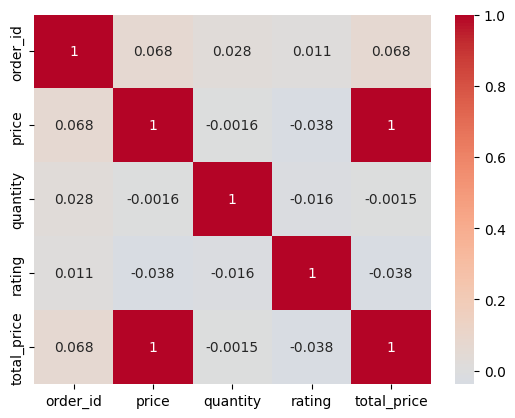

In [458]:
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center = 0)